
Rawan Abdellah   


First: extract data and divide it:
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the dataSet from csv file using pandas
dataSet = pd.read_csv('A_Z Handwritten Data/A_Z Handwritten Data.csv')


In [3]:
#rename the column with position 0 because its the label of the data
dataSet.rename(columns={'0':'label'}, inplace=True)



In [22]:
#here is describtion of the data the min value=0 that points to A letter and the max=25 that points to Z letter
dataSet.describe()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [4]:
#X is a numpy list that contains all the columns after 0 (the images) 
X = dataSet.iloc[:,1:].values
#y is a numpy list that contains the column 0 (the labels) 
y = dataSet.iloc[:,0].values

In [5]:
# sklearn library we used train_test_split function to split 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

Second: train data with the model:
-------

In [6]:
# transform your data such that its distribution will have a mean value 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
# from sklearn library we used the RandomForestClassifier model and use 24 tree
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=24)

In [8]:
# Training the model to get the relation between the image and the char
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
#from sklearn library we used accuracy_score to get the model accuracy (98%)
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_test),y_test)

0.9853940126191435

In [10]:
#to compare between the model prediction and answers 
print(model.predict(X_test))
print(y_test)

[20 14 23 ... 14  7 15]
[20 14 23 ... 14  7 15]


Third:test the model with an image:
-------

In [24]:
import cv2

img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #to make it in gray scale

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU) #to make it binary

# helps in detecting the chars
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
threshed = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, rect_kernel)

#find the Contours of an image then create boundingRect 
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [25]:

images_char = []
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr) #to get x-axis, y-axis, width, hight.

    roi = img[y:y + h, x:x + w] #it gets the position of every char

    area = w*h  #area of the char

    if 250 < area : # we want the area that is bigger than 250 pixel to ignor all the small things on the image
        rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) #draw the rectangle
        images_char.append(gray[y: y + h, x :x + w ]) #take all chars from the gray image and append to list  


#change the size to 28x28 and convert it to vector
for i in range(len(images_char)):
    images_char[i] = cv2.resize(images_char[i],(28,28)).flatten()


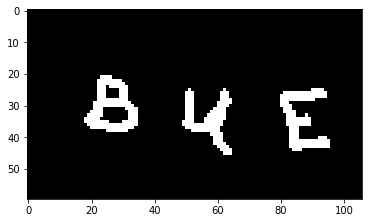

In [40]:
#befor detecting all chars 
plt.imshow(thresh,cmap='gray')

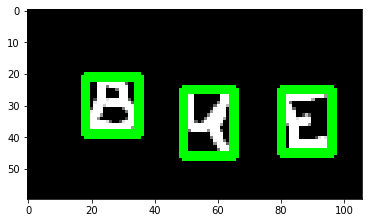

In [41]:
#after detecting all chars 
plt.imshow(rect)

In [28]:
#transform StandardScaler
images_char = ss.transform(images_char)


The final result:
-------

In [29]:
#the detected word in numbers
word_in_num =  model.predict(images_char)
word_in_num

array([ 1, 20,  4])

In [31]:
#dictionary that have all the letters so we can convert the number to a letter
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 

In [35]:
#change array of numbers to string
theFinalWord = ''
for x in word_in_num:
    theFinalWord += alphabets_mapper[x]

In [36]:
print(theFinalWord)

BUE
